## Business Case - Yulu Hypothesis Testing

### Problem Statement
The company wants to know:

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

### Attributes of the dataset - 

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
    * 1: Clear, Few clouds, partly cloudy, partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

### -: Importing the libraries that will be used during the analysis :-

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import levene

### Link for the Dataset: -

https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

In [3]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [4]:
#Head of the dataset.
data.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#Tail of dataset.
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
#Shape pf the dataset.
data.shape 

(10886, 12)

In [7]:
# Size of the data.
data.size 

130632

In [8]:
# Columns of the dataset
data.columns.to_list()

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* Info shows that dataset has three different datatypes.

### Cleaning the dataset.

In [10]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Above code shows that there is no missing value in the Yulu dataset.

In [11]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [16]:
data.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [17]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [23]:
# conversion of categorical attributes to 'category'
data['datetime'] = data['datetime'].astype('datetime64')
data['season'] = data['season'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weather'] = data['weather'].astype('category')

In [24]:
#Categorical column summary
data.describe(include=['category'])

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [25]:
cat_cols = data.dtypes == 'category'

In [26]:
#Extracting categorical column names
cat_cols = cat_cols[cat_cols].index.to_list()

In [27]:
data['season'].value_counts()

#Value counts will not give us the actual counts

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [28]:
# grouping the data by each categorical features and taking the sum of count to get the actual split of count
for col in cat_cols:
  print((data.groupby(col)['count'].sum()/sum(data['count'])).round(4)*100)
  print('`````````````````````````````')

season
1    14.98
2    28.21
3    30.72
4    26.09
Name: count, dtype: float64
`````````````````````````````
holiday
0    97.23
1     2.77
Name: count, dtype: float64
`````````````````````````````
workingday
0    31.4
1    68.6
Name: count, dtype: float64
`````````````````````````````
weather
1    70.78
2    24.32
3     4.90
4     0.01
Name: count, dtype: float64
`````````````````````````````


## Observation

* Most of the rental are happening in season 3: fall followed by 2: summer and 4: winter
* During holidays only less than 3% of the rentals are happenning.
* 69 % of the rentals are happening during the working days and 31% rentals are happening during weekends and holidays.
* 71% of the rentals are happening during 1: Clear, Few clouds, partly cloudy weather followed by 2: Mist + 
Cloudy, Mist + Broken clouds, Mist + Few clouds (24.32%) and 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (4.90%)
* Negligible rentals are happening during heavy rains (0.01%)

In [33]:
num_cols = data.dtypes != 'category'

In [34]:
#Extracting numerical column names
num_cols = num_cols[num_cols].index.to_list()
num_cols

['datetime',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [35]:
#Removing columns from numerical column list
num_cols.remove('datetime')
num_cols.remove('count')
target = 'count'

In [36]:
#Counting missing values
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Observation
* No null values

In [37]:
#Checking duplicate values
data.duplicated().sum()

0

## Observation
* No duplicate values

## Univariate Analysis

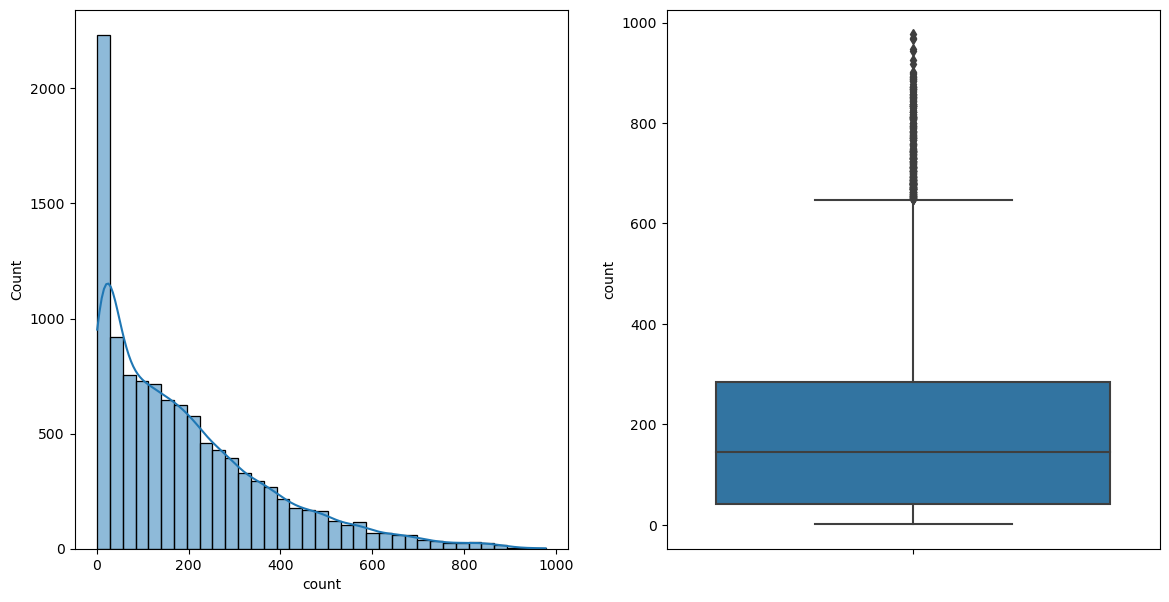

In [38]:
#Visualization of Target Variable Distribution and Boxplot
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.histplot(data[target],kde=True,bins=35)
plt.subplot(1,2,2)
sns.boxplot(data=data,y=target)

plt.show()

## Observation

1. The hourly count is in log normal distribution
2. There are outliers as well

In [39]:
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

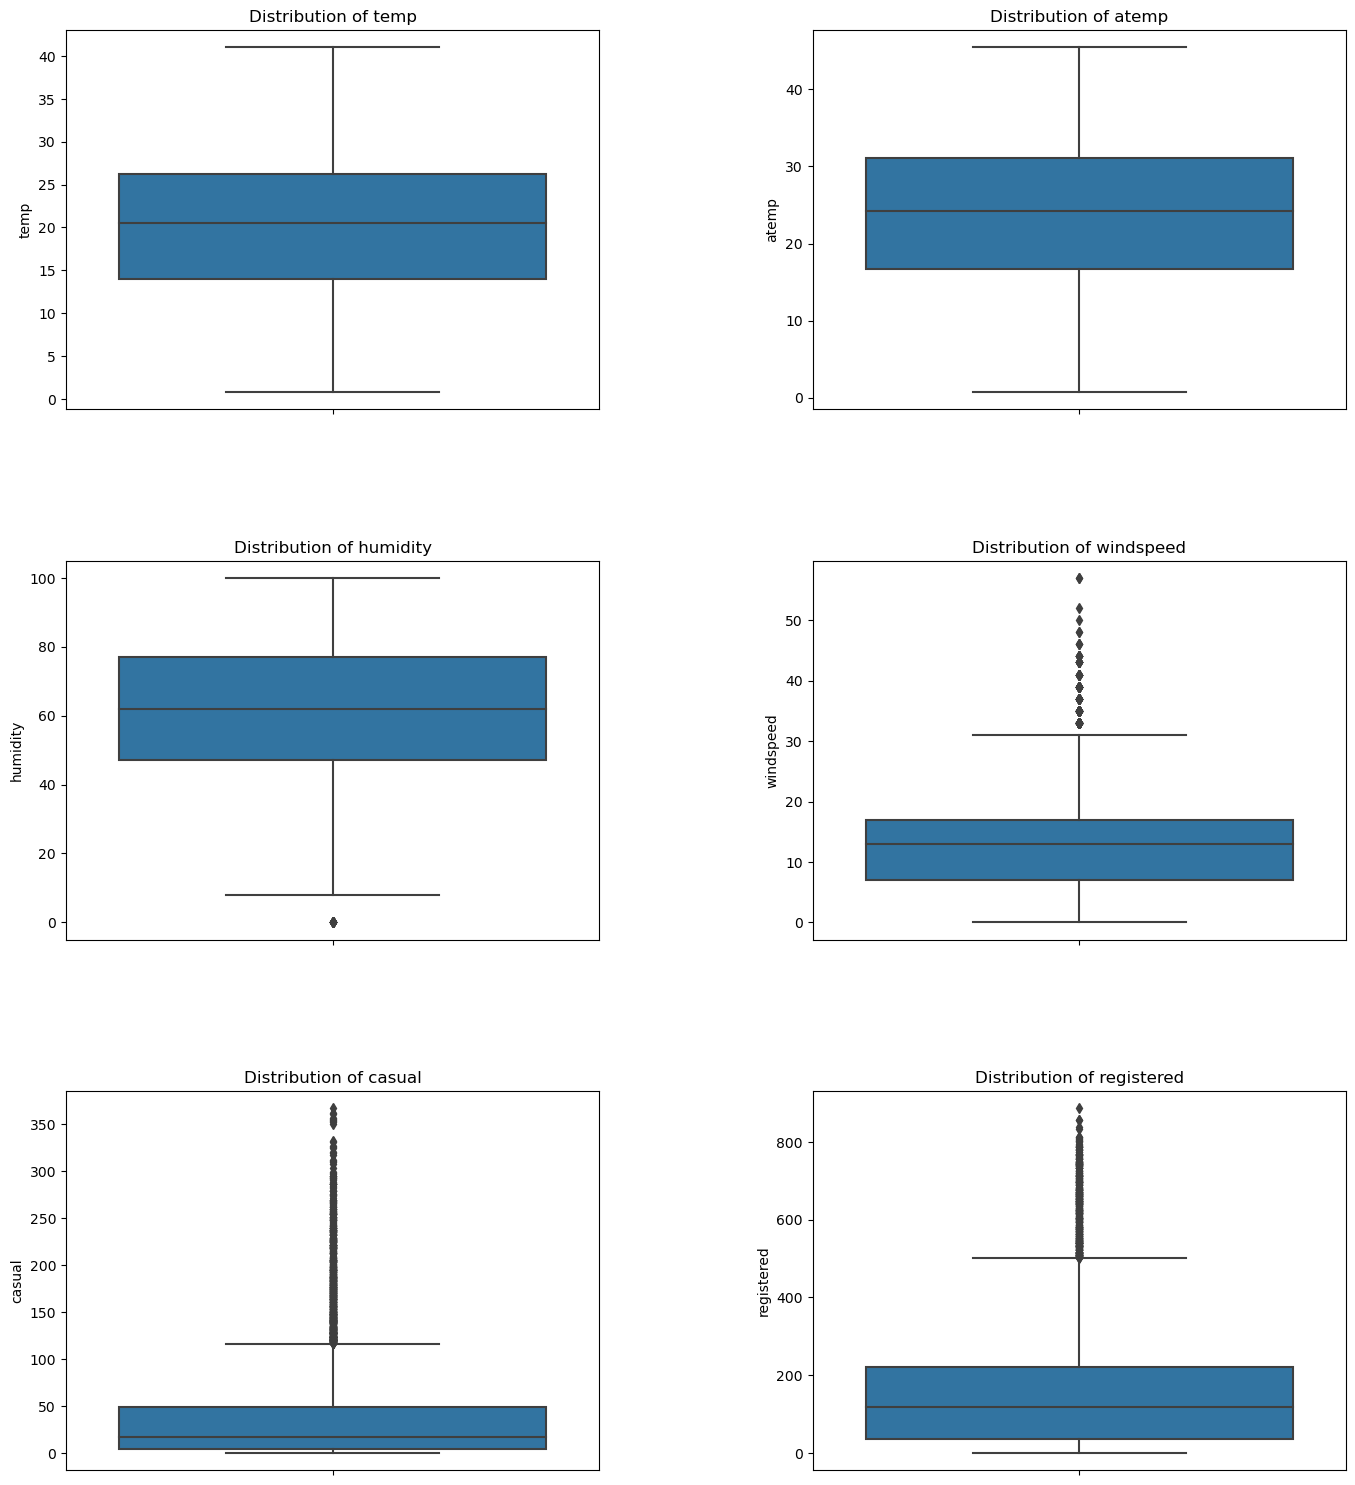

In [41]:
#Visualization of Numerical Variables using Boxplots
fig,axs = plt.subplots(3,2,figsize=(16,12))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=1.3, wspace=0.4, hspace=0.4)
cnt=0
for row in range(3):
    for col in range(2):
        sns.boxplot(data,y=num_cols[cnt],ax=axs[row,col])
        axs[row,col].set_title(f'Distribution of {num_cols[cnt]}')
        cnt+=1
plt.show()

## Observation
* There were days with huge number of rentals compared to normal days from registered users as well as casual users.

* There is also outlier in windspeed.

## Categorical features

In [42]:
cat_cols

['season', 'holiday', 'workingday', 'weather']

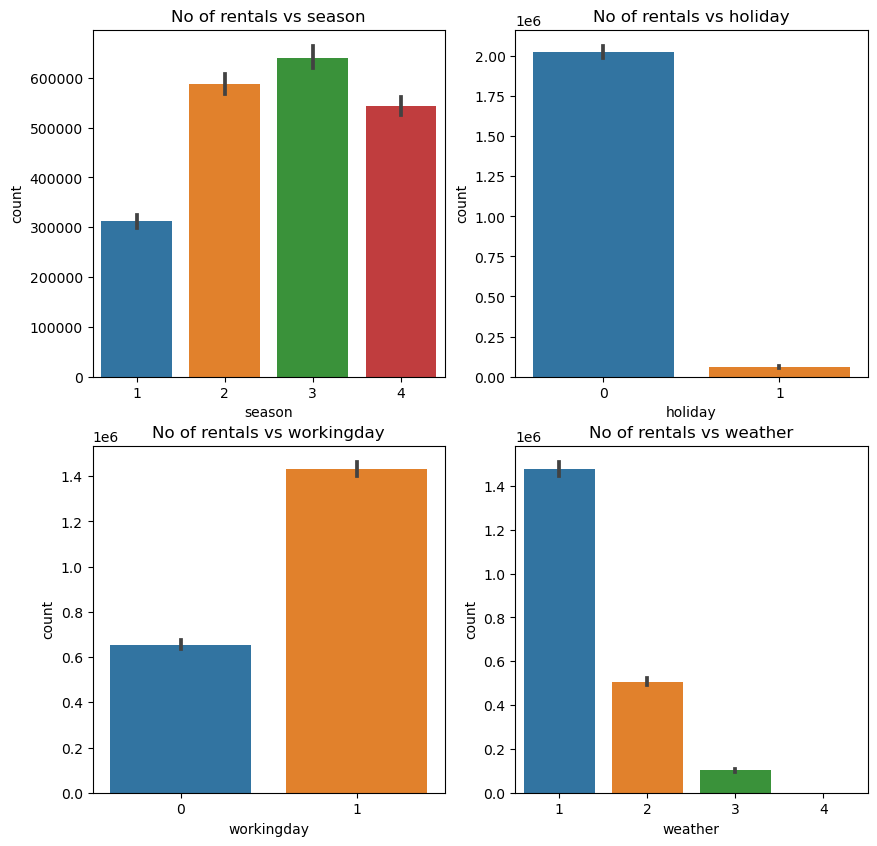

In [44]:
#Visualization of Categorical Variables using Barplots

fig,axs = plt.subplots(2,2,figsize=(10,7))
fig.subplots_adjust(top=1.2)
cnt=0
for row in range(2):
    for col in range(2):
        sns.barplot(data,x=cat_cols[cnt],y= target,estimator = 'sum',ax=axs[row,col])
        axs[row,col].set_title(f'No of rentals vs {cat_cols[cnt]}')
        cnt+=1
plt.show()

## Observation
1. The majority of rentals occur during the fall season, followed by summer and winter, indicating a preference for renting bikes during these times of the year.
2. Holidays have a minimal impact on rentals count, with less than 3% of the rentals occurring during holiday periods.
3. Rentals are more prevalent on working days, comprising 69% of the total rentals, while weekends and holidays account for 31% of rentals.
4. The most common weather conditions during rental periods are clear skies with few clouds (71%), followed by misty or cloudy conditions (24.32%), and light snow or rain with scattered clouds (4.90%).
5. Heavy rainfall has an insignificant effect on rentals count, with only 0.01% of rentals occurring during such weather conditions.

## Insights
These observations provide valuable insights into the rental patterns and preferences of customers. They suggest that seasonality, working days, and favorable weather conditions play significant roles in determining the demand for bike rentals. Additionally, the data indicates that customers may be less inclined to rent bikes during holidays and periods of heavy rainfall.

## Bivariate Analysis

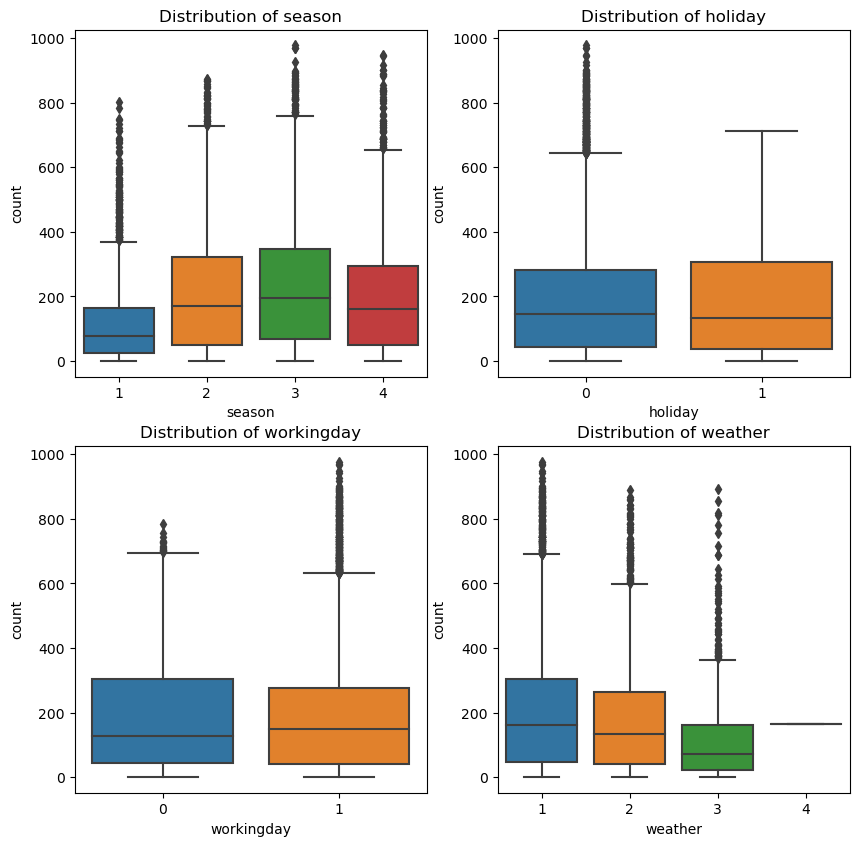

In [45]:
#Visualization of Categorical Variables using Boxplots
fig,axs = plt.subplots(2,2,figsize=(10,7))
fig.subplots_adjust( top=1.2)
cnt=0
for row in range(2):
    for col in range(2):
        sns.boxplot(data,x=cat_cols[cnt],y=target,ax=axs[row,col])
        axs[row,col].set_title(f'Distribution of {cat_cols[cnt]}')
        cnt+=1
plt.show()


## Observation

1. We can observe season 3: fall has highest median.
2. Weather 1 (Clear) also has higest median
3. Weather 4 (Heavy rain) has negligible rentals

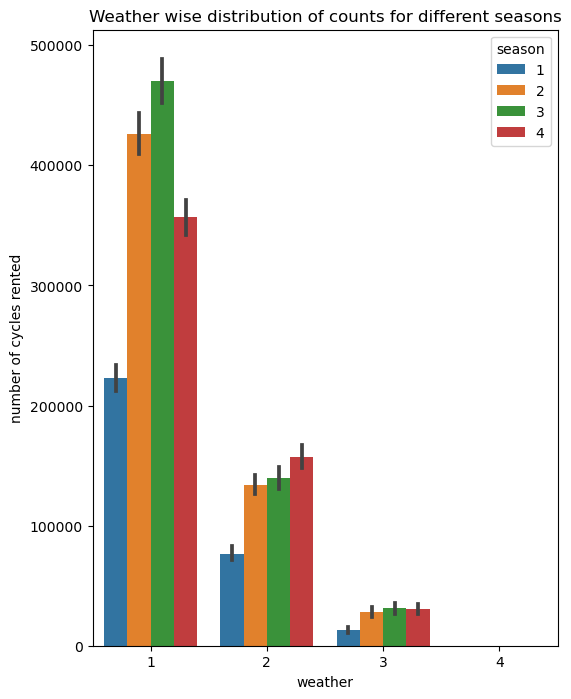

In [48]:
# understanding the weather wise distribution of number of cycles rented for different seasons
fig,ax=plt.subplots(figsize=(6,8))
#Barplot for weather distribution of counts
sns.barplot(data=data,x='weather',y='count',hue='season', estimator='sum')
plt.ylabel("number of cycles rented")
ax.set_title('Weather wise distribution of counts for different seasons')
plt.show()

Observations: 
1. the number of rented cycles are maximum on days with Clear, Few clouds and partly cloudy in summer and fall seasons.
2. The least number of cycles are rented on days having Light Snow, Light Rain, Thunderstorm, Scattered clouds in spring season.
3. Almost no cycles where rented on days with Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow, Fog (except in summer season).

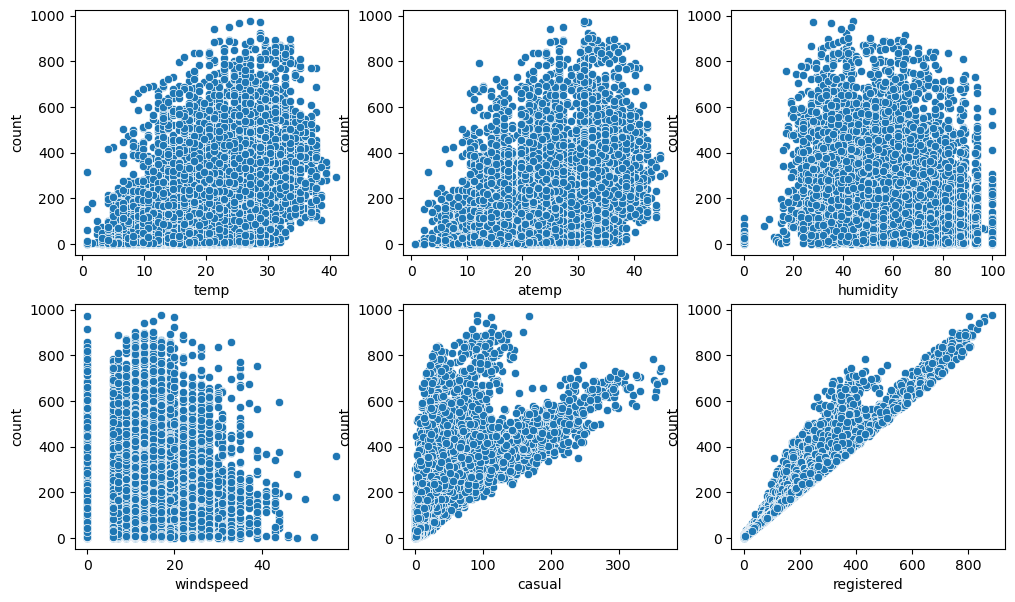

In [49]:
# plotting scatter plot for all numerical variables vs count
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

i= 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=data, x=num_cols[i], y='count', ax=axis[row, col])
        i += 1
        
plt.show()

**Observation:**

1. Fewer cycles are rented on days when the temperature is below 10 degrees Celsius. This is likely because people are less likely to want to ride a bike in cold weather.
2. Fewer cycles are rented on days when the humidity is below 18%. This is likely because people are less likely to want to ride a bike in dry weather.
3. Fewer cycles are rented on days when the wind speed is above 35 kilometers per hour. This is likely because people are less likely to want to ride a bike in windy weather.
4. The graph of registered users vs. count appears to be linear. This means that there is a direct relationship between the number of registered users and the number of cycles rented. In other words, as the number of registered users increases, the number of cycles rented also increases.

C:\Users\SHAHNOOR ALAM\AppData\Local\Temp\ipykernel_8428\2873458741.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='crest')


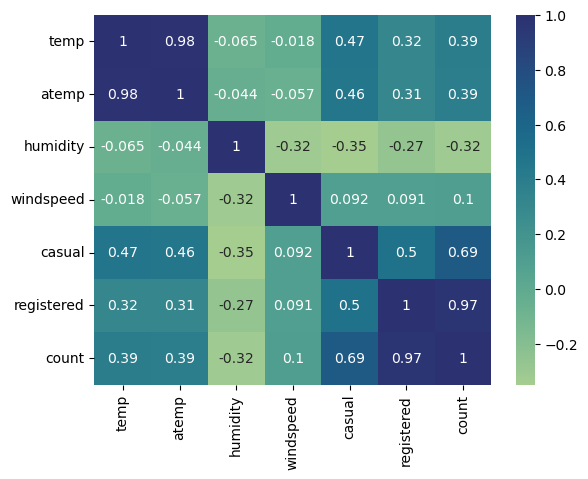

In [53]:
#Correlation Heatmap
sns.heatmap(data.corr(),annot=True,cmap='crest')
plt.show()

Observations:
1. We can observe that there is a correlation between count and temp

In [54]:
#Adding and converting a Date column
data.insert(0,"Date",data['datetime'].dt.date)
data['Date'] = data['Date'].astype('datetime64')

# Hypothesis test - 1

#### Checking if working Day has effect on number of electric cycles rented

In [55]:
data.head()

,Date,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [56]:
# Grouping and Aggregating by Date and Working Day
wgp = data.groupby(['Date']).agg({'workingday':'first','count':'sum'}).reset_index()
workingday = wgp[wgp['workingday']==1]['count']
non_workingday = wgp[wgp['workingday']==0]['count']

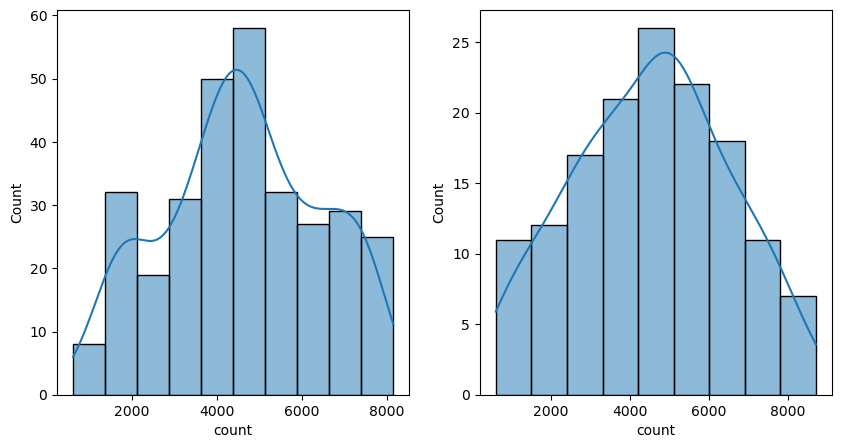

In [57]:
#Histograms of Rental Counts for Working and Non-working Days
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(workingday,kde=True)
plt.subplot(1,2,2)
sns.histplot(non_workingday,kde=True)
plt.show()

### Follows a normal distribution

### Assumptions before conducting 2-sample ttest:

1. Whether the two sample data groups are independent.
2. Whether the data elements in respective groups follow any normal distribution.
3. Homogeneity assumption: Whether the given two samples groups have similar variances

### two tail test

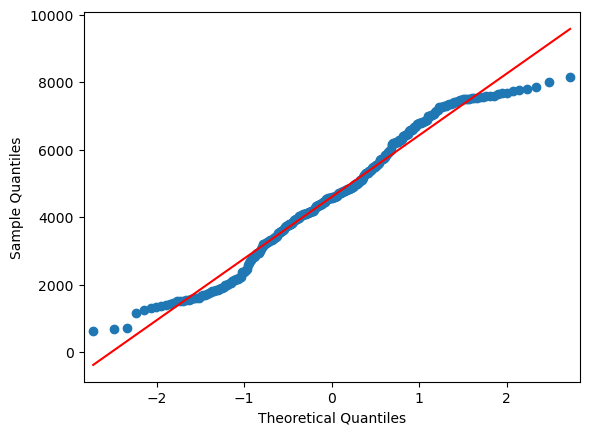

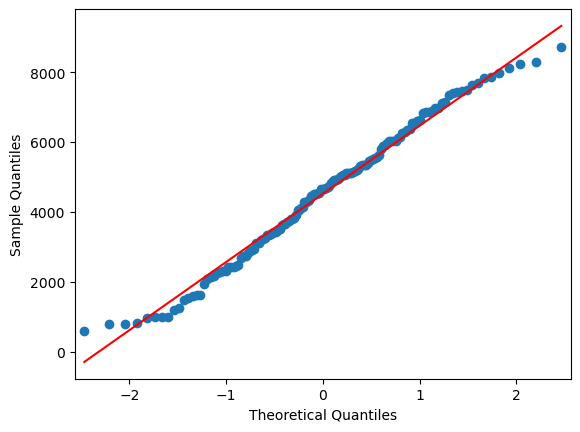

In [60]:
#QQ Plots of Rental Counts for Working and Non-working Days
qqplot(workingday,line='s')
plt.show()
qqplot(non_workingday,line='s')
plt.show()

### Levene's Test for Equality of Variances

In [61]:
# HO : Variance of the two data_groups are equal
# H1 : Variance are different
test_statistics , p_value = levene(workingday, non_workingday, center='mean')
print(  "p_value = ",p_value )
if p_value < 0.05:
    print ("Reject H0")
    print (" Variance are different")
else :
    print("Fail to reject H0")
    print("Variance are equal")

p_value =  0.2640980298404097
Fail to reject H0
Variance are equal


#### Independent Two-Sample T-test

In [63]:
#H0 : Working day has no effect on the number of cycles being rented.
#H1 : Working day has effect on the number of cycles being rented.
test_statistics , p_value = ttest_ind(workingday, non_workingday, equal_var=True)
print(  "p_value = ",p_value  )
if p_value < 0.05:
    print ("Reject H0")
    print (" Working day has effect on the number of cycles being rented.")
else :
    print("Fail to reject H0")
    print("Working day has no effect on the number of cycles being rented.")

p_value =  0.656696335987859
Fail to reject H0
Working day has no effect on the number of cycles being rented.


## Hypothesis testing - 2
#### Checking if no. of cycles rented are similar or different in different seasons

In [64]:
# Grouping and Aggregating by Date and Season
gp = data.groupby(['Date']).agg({'season':'first','count':'sum'}).reset_index() #Each day has only one season hence 'first'
gp['season'].value_counts()

1    114
2    114
3    114
4    114
Name: season, dtype: int64

In [65]:
#Subset of Rental Counts by Season
s1 = gp[gp['season']==1]['count']
s2 = gp[gp['season']==2]['count']
s3 = gp[gp['season']==3]['count']
s4 = gp[gp['season']==4]['count']

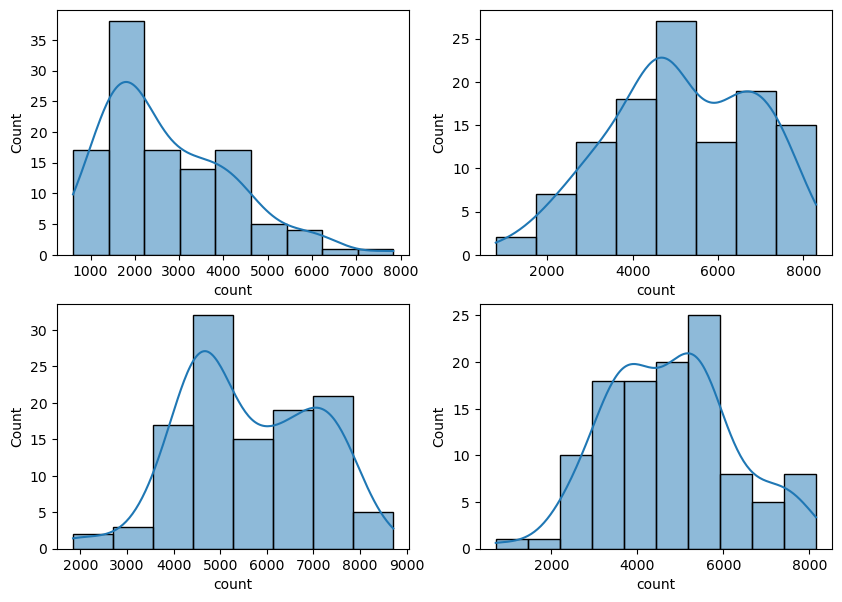

In [72]:
#Histograms of Rental Counts by Season

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.histplot(s1,kde=True)

plt.subplot(2,2,2)
sns.histplot(s2,kde=True)

plt.subplot(2,2,3)
sns.histplot(s3,kde=True)

plt.subplot(2,2,4)
sns.histplot(s4,kde=True)

plt.show()

* Follows close to normal distribution

* Assumptions before conducting 2-sample ttest:

1. Whether the two sample data groups are independent.
2. Whether the data elements in respective groups follow any normal distribution.
3. Homogeneity assumption: Whether the given two samples groups have similar variances

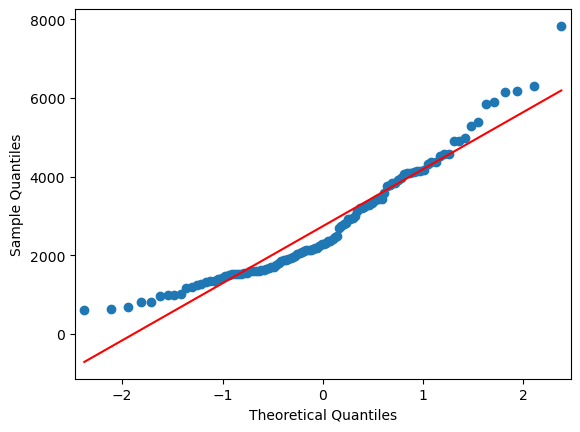

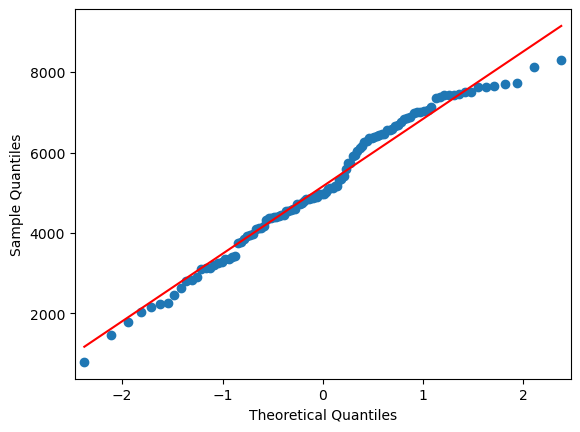

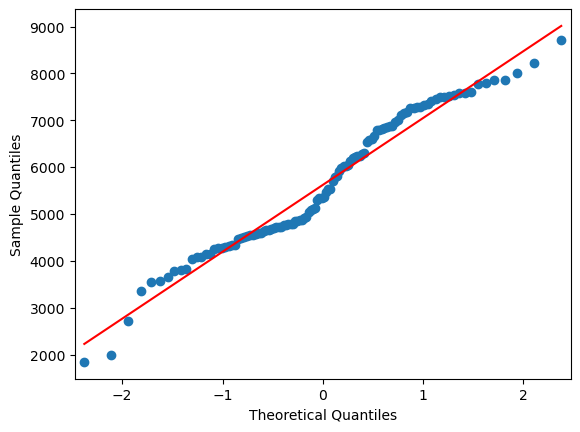

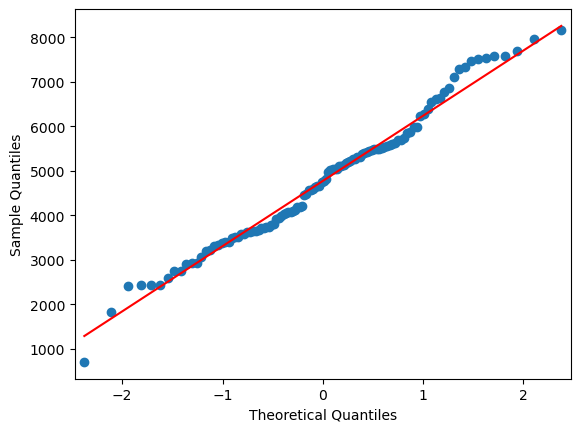

In [73]:
#QQ Plots of Rental Counts by Season

qqplot((s1),line='s')
plt.show()
qqplot((s2),line='s')
plt.show()
qqplot((s3),line='s')
plt.show()
qqplot((s4),line='s')
plt.show()

### Levene's test to check the variance

In [74]:
# HO : Variance of the two data_groups are equal
# H1 : Variance are different
test_statistics , p_value = levene(s1,s2,s3,s4,center='mean')
print(  "p_value = ",p_value )
if p_value < 0.05:
    print ("Reject H0")
    print (" Variance are different")
else :
    print("Fail to reject H0")
    print("Variance are equal")

p_value =  0.21025379996481036
Fail to reject H0
Variance are equal


### One-Way ANOVA Test for Rental Counts by Season

In [75]:
#H0 :Number of cycles rented is similar in all 4 season.
#H1 :Number of cycles rented is different in atleast any one of 4 season.
test_statistics , p_value = f_oneway(s1, s2, s3, s4)
print(  "p_value = ",p_value  )
if p_value < 0.05:
    print ("Reject H0")
    print ("Number of cycles rented is different in all 4 seasons")
else :
    print("Fail to reject H0")
    print("Number of cycles rented is similar in atleast any one of 4 season")

p_value =  1.506580502991204e-41
Reject H0
Number of cycles rented is different in all 4 seasons


## Hypothesis testing - 3
checking if no. of cycles rented similar or different in different weather

In [76]:
#Grouping and Aggregating Rental Counts by Date and Weather
weagp = data.groupby(['Date','weather']).agg({'count':'sum'}).reset_index()
weagp

,Date,weather,count
0,2011-01-01,1,305
1,2011-01-01,2,608
2,2011-01-01,3,72
3,2011-01-01,4,0
4,2011-01-02,1,165
...,...,...,...
1819,2012-12-18,4,0
1820,2012-12-19,1,5267
1821,2012-12-19,2,0
1822,2012-12-19,3,0


In [77]:
#Subset of Rental Counts by Weather
w1 = weagp[weagp['weather']==1]['count']
w2 = weagp[weagp['weather']==2]['count']
w3 = weagp[weagp['weather']==3]['count']
w4 = weagp[weagp['weather']==4]['count']

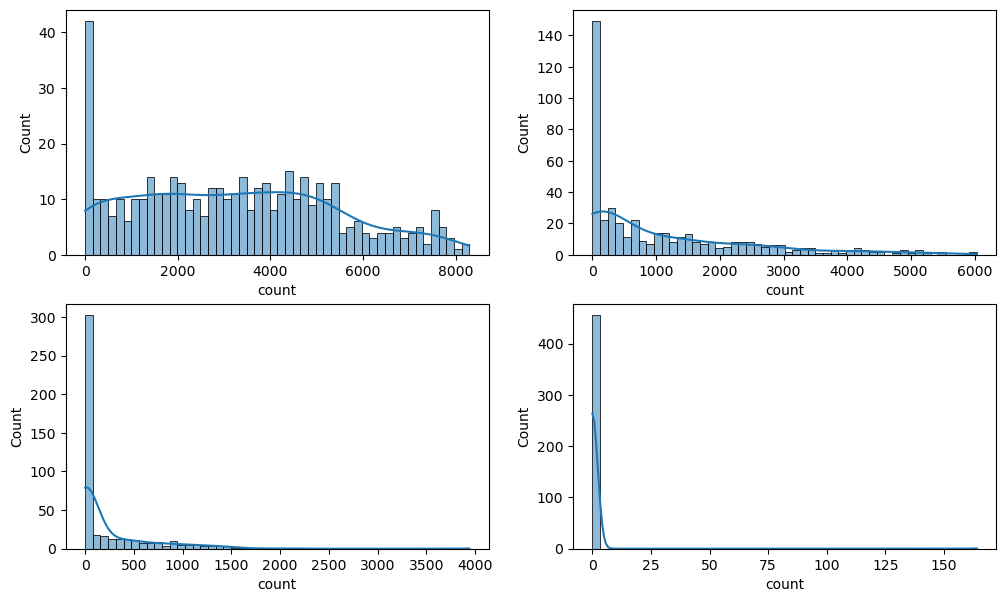

In [78]:
#Histograms of Rental Counts by Weather Condition
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.histplot(w1,bins=50,kde=True)

plt.subplot(2,2,2)
sns.histplot(w2,bins=50,kde=True)

plt.subplot(2,2,3)
sns.histplot(w3,bins=50,kde=True)

plt.subplot(2,2,4)
sns.histplot(w4,bins=50,kde=True)
plt.show()

Assumptions before conducting ANOVA:

1. Whether the sample data groups are independent.
2. Whether the data elements in respective groups follow any normal distribution.
3. Homogeneity assumption: Whether the given samples groups have similar variances

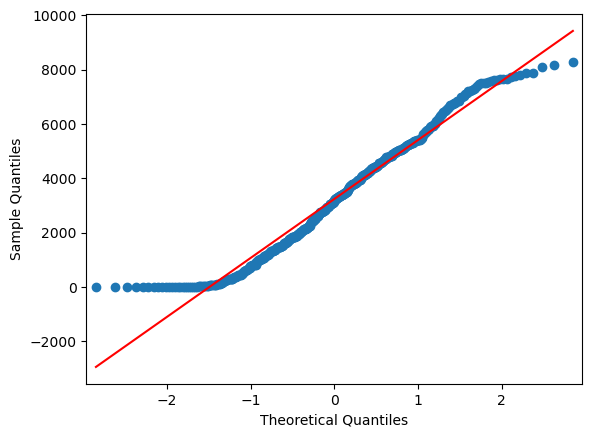

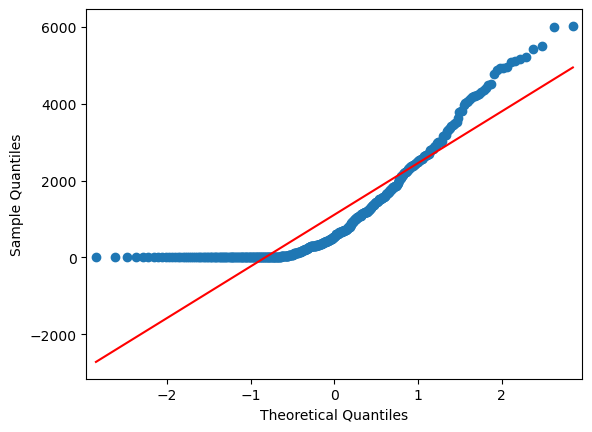

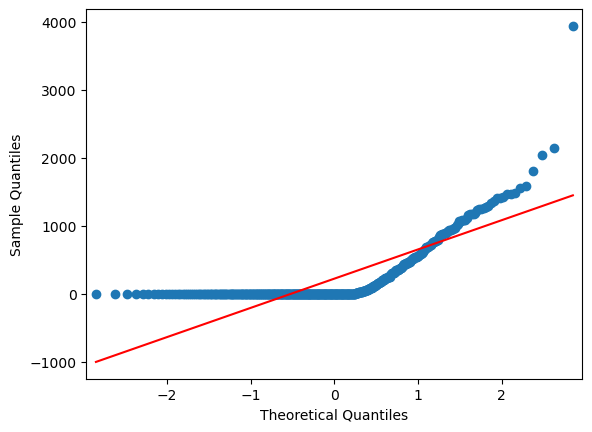

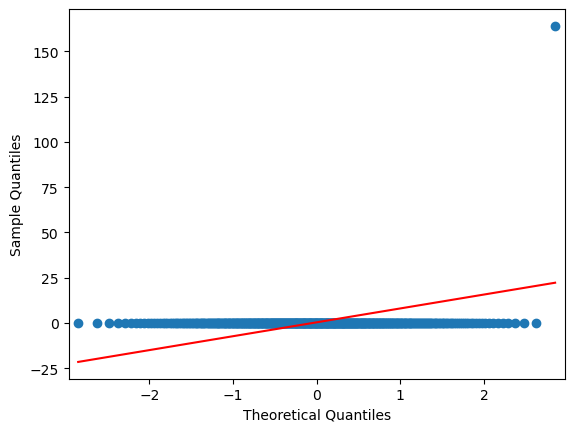

In [79]:
#QQplot to check normality
qqplot(w1,line='s')
plt.show()
qqplot(w2,line='s')
plt.show()
qqplot(w3,line='s')
plt.show()
qqplot(w4,line='s')
plt.show()

Levene test for variance

In [80]:
# HO : Variances are equal
# H1 : Variances are different
test_statistics , p_value = levene(w1,w2,w3,w4)
print(  "p_value = ",p_value )
if p_value < 0.05:
    print ("Reject H0")
    print ("Variances are different")
else :
    print("Fail to reject H0")
    print("Variances are equal")

p_value =  1.1722855119074489e-223
Reject H0
Variances are different


One-Way ANOVA Test for Rental Counts by Weather Condition

In [81]:
#H0 :Number of cycles rented is similar in all 4 seasons.
#H1 :Number of cycles rented is different in all 4 seasons.
test_statistics , p_value = stats.f_oneway(w1,w2,w3,w4)
print(  "p_value = ",p_value  )
if p_value < 0.05:
    print ("Reject H0")
    print ("Number of cycles rented is different in atlease one of the weather")
else :
    print("Fail to reject H0")
    print("Number of cycles rented is similar in all 4 weathers")

p_value =  3.335580377038182e-268
Reject H0
Number of cycles rented is different in atlease one of the weather


## Hypothesis test -4

Check if Weather is dependent on the season

In [82]:
#Crosstab of Season and Weather
crosstab = pd.crosstab(data['season'], data['weather'])
crosstab

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


#### Chi-square Test of Independence for Season and Weather

In [83]:
# HO : Weather is independent of the season
# H1 : Weather is dependent of the season

test_statistic, p_value, dof, expected = chi2_contingency(crosstab)
print ("test_statistic =", test_statistic)
print("p_value =",p_value)
print("dof =",dof)
print("expected obseravtions =", expected)

if p_value < 0.05:
    print ("Reject H0")
    print ("Weather is dependent of the season")
else :
    print("Fail to reject H0")
    print("Weather is independent of the season")

test_statistic = 49.158655596893624
p_value = 1.549925073686492e-07
dof = 9
expected obseravtions = [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Reject H0
Weather is dependent of the season


## Summary and Insights
1. Rental patterns: The majority of rentals occur during the fall season, followed by summer and winter, indicating a preference for renting bikes during these times of the year. Holidays have minimal impact on rental count, with less than 3% of rentals occurring during holiday periods. Rentals are more prevalent on working days, comprising 69% of the total rentals, while weekends and holidays account for 31% of rentals. The most common weather conditions during rental periods are clear skies with few clouds (71%), followed by misty or cloudy conditions (24.32%), and light snow or rain with scattered clouds (4.90%). Heavy rainfall has an insignificant effect on rental count, with only 0.01% of rentals occurring during such weather conditions.

2. Outliers and distribution: The hourly count of rentals follows a log-normal distribution, with outliers present. There are also outliers in the windspeed data.

3. Seasonal impact: Season 3 (fall) has the highest median rental count, indicating a peak demand during this season. Similarly, weather condition 1 (clear) also has the highest median rental count, while weather condition 4 (heavy rain) has negligible rentals.

4. Temperature, humidity, and wind speed: There is a correlation between rental count and temperature, indicating that people are more likely to rent bikes when the temperature is higher. However, there is a decrease in rentals when the humidity is below 18%, suggesting that dry weather may deter people from renting bikes. Additionally, there is a decrease in rentals when the wind speed exceeds 35 kilometers per hour, indicating that windy conditions may discourage bike rentals.

5. Registered users: There is a linear relationship between the number of registered users and the number of cycles rented, suggesting that the number of registered users influences the overall rental count.

## Recommendations

1. Focus marketing efforts and promotions during the fall season, as it has the highest rental demand.
2. Ensure that bike availability is sufficient during working days, as they contribute to the majority of rentals.
3. Monitor weather conditions and adjust bike availability accordingly. Promote rentals on days with clear skies and favorable weather.
4. Consider implementing strategies to attract more rentals during holidays and periods of heavy rainfall, such as targeted promotions or discounts.
5. Regularly monitor and maintain bikes to address outliers and ensure a smooth rental experience for customers.
6. Explore opportunities to attract more registered users, as their numbers directly influence the overall rental count.